In [1]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' +\
                                            'master/dataset/wine.csv'

wine = pd.read_csv(wine_url, index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
wine['taste'] = [1 if grade>5 else 0 for grade in wine['quality']]
X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=13)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('train accuracy : ', accuracy_score(y_pred_tr, y_train) )
print('test accuracy : ', accuracy_score(y_pred_test, y_test))

train accuracy :  0.7427361939580527
test accuracy :  0.7438461538461538


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
              ('model', LogisticRegression(solver='liblinear', random_state=13))]

lr_pipe = Pipeline(estimators)

In [15]:
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [16]:
y_pred_tr = lr_pipe.predict(X_train)
y_pred_test = lr_pipe.predict(X_test)

print('train accuracy : ', accuracy_score(y_pred_tr, y_train) )
print('test accuracy : ', accuracy_score(y_pred_test, y_test))

train accuracy :  0.7444679622859341
test accuracy :  0.7469230769230769


In [17]:
from sklearn.tree import DecisionTreeClassifier


estimators = [('scaler', StandardScaler()),
              ('model', DecisionTreeClassifier(max_depth=2, random_state=13))]

tree_pipe = Pipeline(estimators)

tree_pipe.fit(X_train, y_train)

y_pred_tr = tree_pipe.predict(X_train)
y_pred_test = tree_pipe.predict(X_test)

print('train accuracy : ', accuracy_score(y_pred_tr, y_train) )
print('test accuracy : ', accuracy_score(y_pred_test, y_test))

train accuracy :  0.7294593034442948
test accuracy :  0.7161538461538461


In [18]:
from sklearn.tree import DecisionTreeClassifier

models = {'logistics regression' : lr_pipe,
          'decision tree' : tree_pipe}

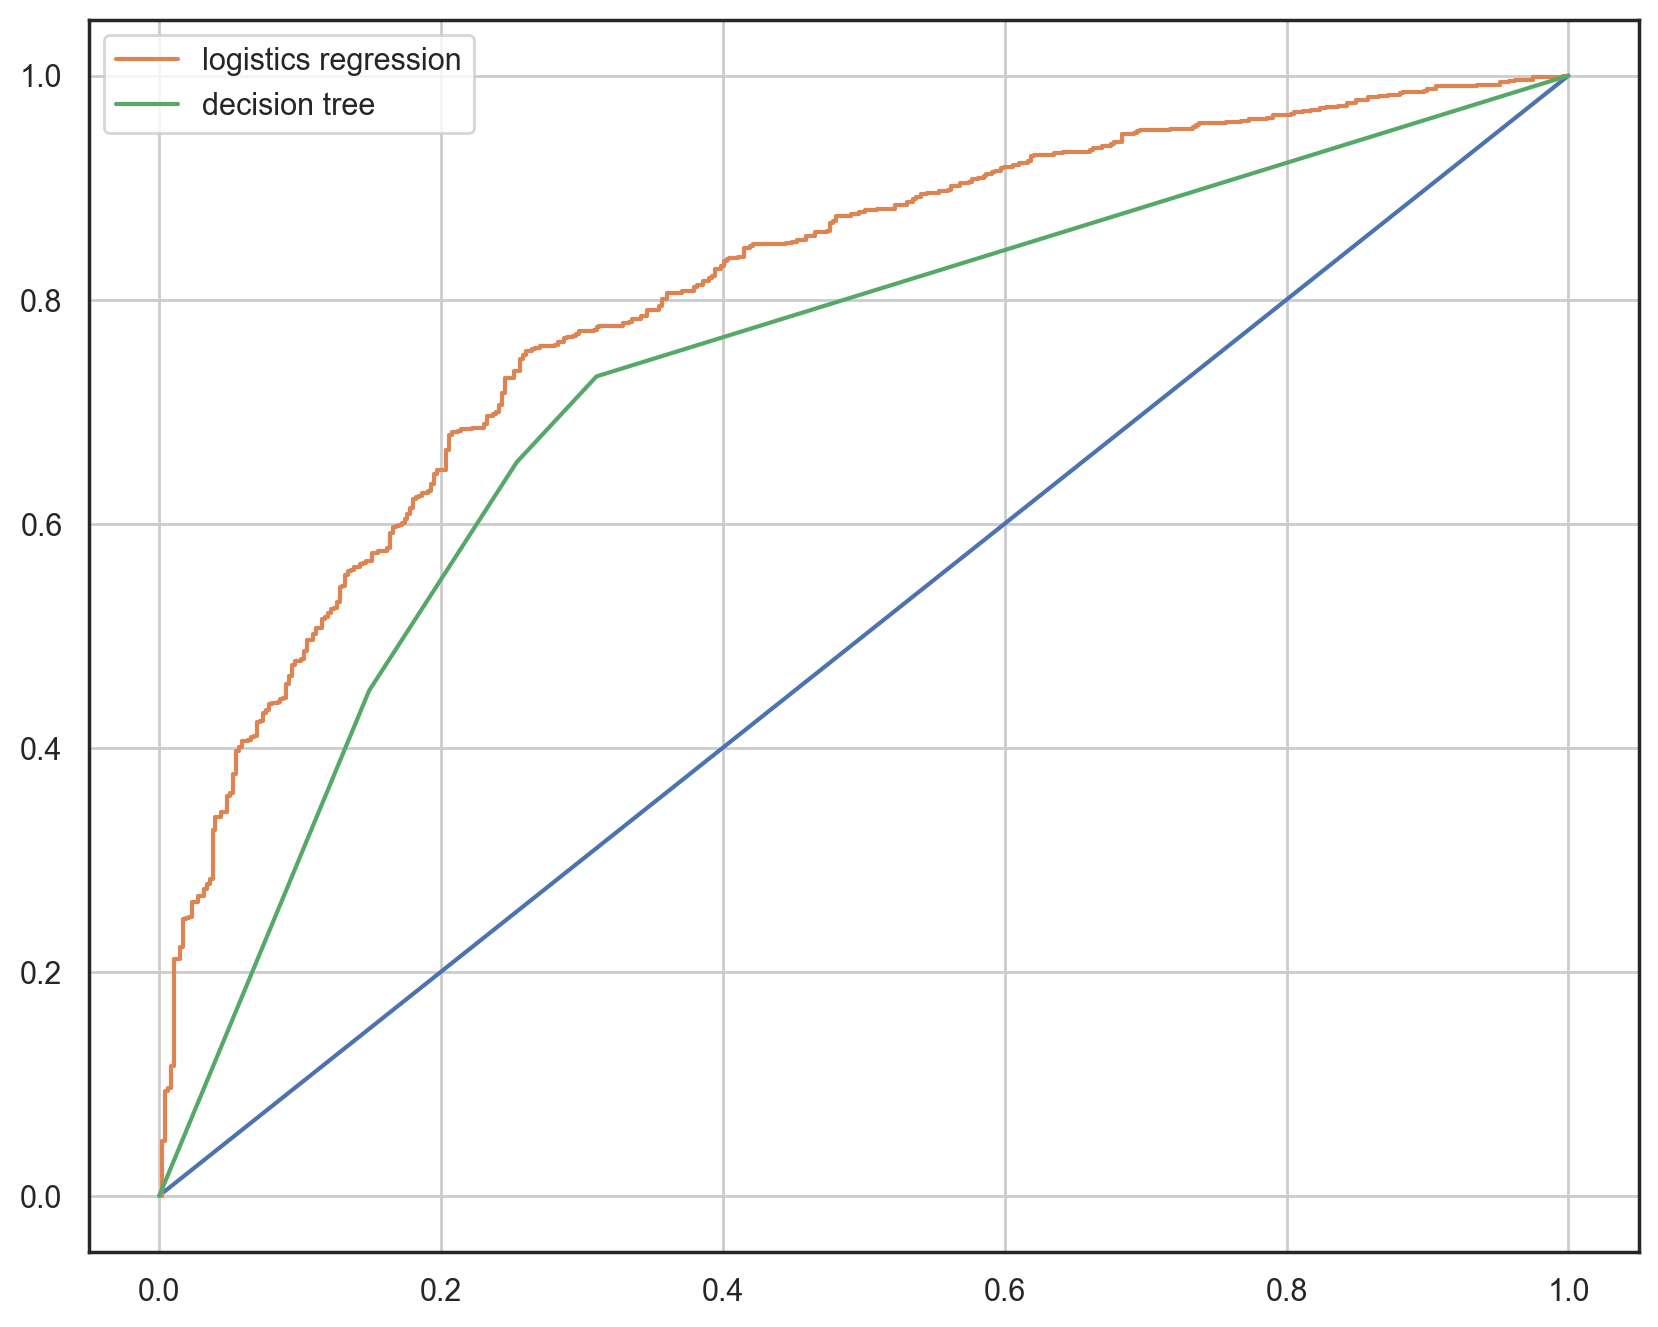

In [19]:
### AUC 그래프 분석은에 의미있는것은 밑 면적이고
### 이 면적의 넓이가 클수록 모델의 성능이 좋다
### 0.9 ~ 1.0 Excellent
### 0.8 ~ 0.9 Good
### 0.7 ~ 0.8 Fair
### 0.7 > AUC poor

from sklearn.metrics import roc_curve

plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1])
for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, label=model_name)
    
plt.grid()
plt.legend()
plt.show()